In [111]:
from pymatgen import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.site_symmetries import *
from pymatgen.io.cif import CifWriter
from pymatgen.io.vasp import Poscar
from pymatgen.io.cif import CifParser
from jupyter_jsmol.pymatgen import quick_view
from IPython.display import Image
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
with MPRester("ysmdUA3p65f0e7CxMBwL") as m:
    
    material_id = "mp-961659"   
    structure = m.get_bandstructure_by_material_id(material_id)


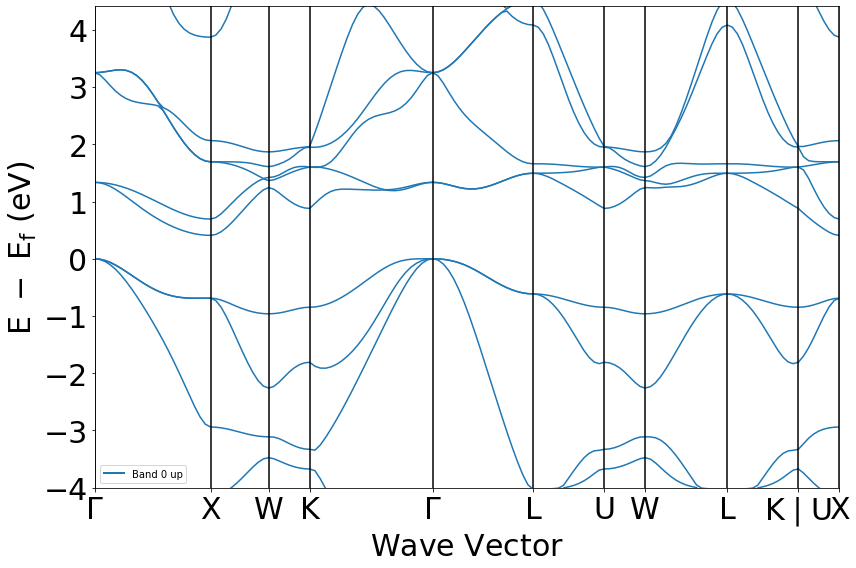

In [112]:
plot = BSPlotter(structure)
plot.show()
gap = structure.get_band_gap()

In [113]:
print("La bande interdite est directe :", gap['direct'],", ce qui veut dire que la bande interdite est indirecte comme nous pouvons l'observer sur le graphe.")
print("La largeur de la bande interdite est de :", gap['energy'], "eV")
print("Le déplacement du vecteur d'onde vaut donc :", gap['transition'])

La bande interdite est directe : False , ce qui veut dire que la bande interdite est indirecte comme nous pouvons l'observer sur le graphe.
La largeur de la bande interdite est de : 0.4087000000000005 eV
Le déplacement du vecteur d'onde vaut donc : \Gamma-X


In [114]:
print(structure.get_vbm()['band_index'],"\n")
print("La bande numéro 11 a la plus grande énergie de la bande de valence \n")
print(structure.get_cbm()['band_index'],"\n")  
print("La bande numéro 12 a la plus basse énergie de la bande de conduction")

defaultdict(<class 'list'>, {<Spin.up: 1>: [9, 10, 11]}) 

La bande numéro 11 a la plus grande énergie de la bande de valence 

defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}) 

La bande numéro 12 a la plus basse énergie de la bande de conduction


In [115]:
infos = plot.bs_plot_data()
energy = infos.get('energy')['1']
distance = infos.get('distances')

index = 11

inf = 100
sup = -100

for i in range (9): 
    delta = abs(((energy[i][index][-1]-energy[i][index][0]))/(distance[i][-1]-distance[i][0]))
    if (delta < inf ):
        inf = delta
        indice_inf = i 
    if (delta > sup):
        sup = delta
        indice_sup = i
        
print('Delta maximum : ', sup ,'pour indice qui vaut :', indice_sup)
print('Delta minimum : ', inf, 'pour indice qui vaut :', indice_inf)

Delta maximum :  0.7478795240500332 pour indice qui vaut : 3
Delta minimum :  0.3037239988500233 pour indice qui vaut : 2


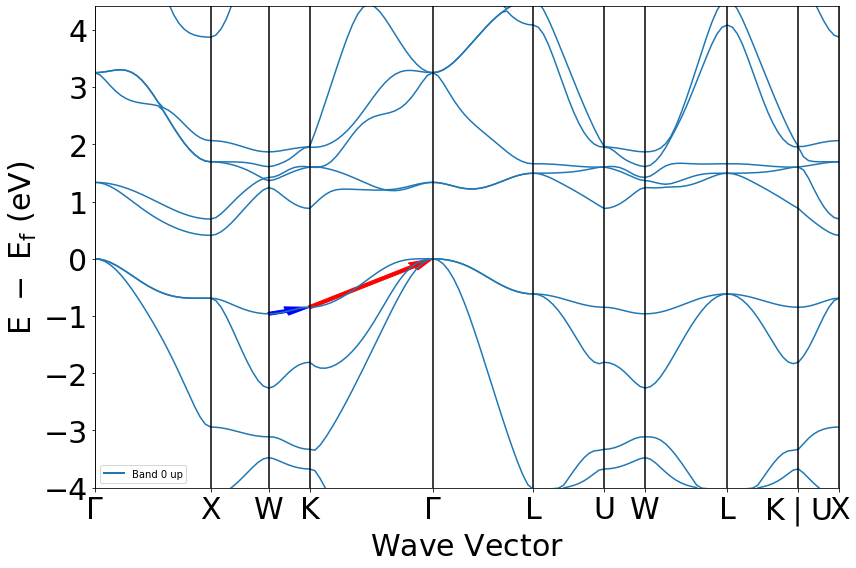

In [116]:
dist0 = distance[indice_inf][0]
dist1 = distance[indice_inf][-1]
dist2 = distance[indice_sup][0]
dist3 = distance[indice_sup][-1]
energy0 = energy[indice_inf][index][0]
energy1 = energy[indice_inf][index][-1]
energy2 = energy[indice_sup][index][0]
energy3 = energy[indice_sup][index][-1]

pl = BSPlotter(structure).get_plot()

plt.arrow(dist0,energy0,dist1 - dist0, energy1 - energy0,color='b',width=0.05,length_includes_head=True)
plt.arrow(dist2,energy2, dist3 - dist2, energy3 - energy2,color='r',width=0.05,length_includes_head=True)

In [117]:
infos = plot.bs_plot_data()
energy = infos.get('energy')['1']
distance = infos.get('distances')

index = 12

inf1 = 100
sup1 = -100

for i in range (9): 
    delta = abs(((energy[i][index][-1]-energy[i][index][0]))/(distance[i][-1]-distance[i][0]))
    if (delta < inf1 ):
        inf1 = delta
        indice_inf1 = i 
    if (delta > sup1):
        sup1 = delta
        indice_sup1 = i
        
print('Delta maximum : ', sup1,'pour indice qui vaut :', indice_sup1)
print('Delta minimum : ', inf1,'pour indice qui vaut :', indice_inf1)

Delta maximum :  1.562150733384291 pour indice qui vaut : 1
Delta minimum :  0.17177658452402303 pour indice qui vaut : 4


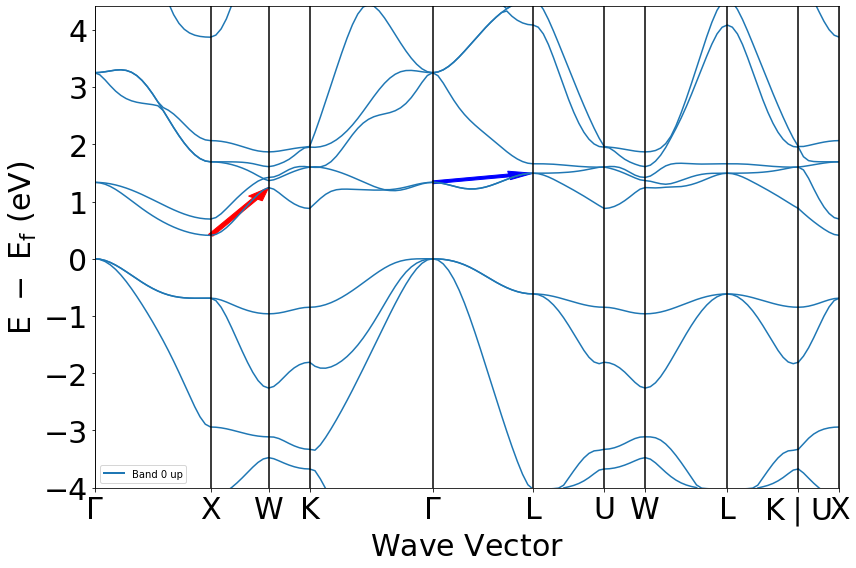

In [118]:
pl = BSPlotter(structure).get_plot()

dist0 = distance[indice_inf1][0]
dist1 = distance[indice_inf1][-1]
dist2 = distance[indice_sup1][0]
dist3 = distance[indice_sup1][-1]
energy0 = energy[indice_inf1][index][0]
energy1 = energy[indice_inf1][index][-1]
energy2 = energy[indice_sup1][index][0]
energy3 = energy[indice_sup1][index][-1]

plt.arrow(dist2,energy2, dist3 - dist2, energy3 - energy2,color='r',width=0.05,length_includes_head=True)
plt.arrow(dist0,energy0, dist1 - dist0, energy1 - energy0,color='b',width=0.05,length_includes_head=True)

In [121]:
#interpolation par 3 points car plus précis que 2 points 

[x1,y1] = [distance[indice_sup][0],energy[indice_sup][11][0]]     
[x2,y2] = [distance[indice_sup+4][0],energy[indice_sup+4][11][0]] 
[x3,y3] = [distance[indice_sup+1][0],energy[indice_sup+1][11][0]] 

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)        
                                
masse = -(1.054571818*10**(-34))**2/(2*a*(10**(-20)*1.602176563*10**(-19)))                        
print('masse effective = ', masse, 'kg')

masse effective =  8.651353618067353e-30 kg


In [122]:
#interpolation par 3 points car plus précis que 2 points 

[x1,y1] = [distance[indice_inf1][0],energy[indice_inf1][12][0]]     
[x2,y2] = [distance[indice_inf1-2][0],energy[indice_inf1-2][12][0]] 
[x3,y3] = [distance[indice_inf1+2][0],energy[indice_inf1+2][12][0]] 

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)        
                                
masse = -(1.054571818*10**(-34))**2/(2*a*(10**(-20)*1.602176563*10**(-19)))                        
print('masse effective = ', masse, 'kg')

masse effective =  3.0644802744525613e-29 kg
